In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogFormatterSciNotation

In [2]:
path_1 = r'..\data\20220510_MC_concentration_study.xlsx'
path_2 = r'..\data\20220512_MC_conc_study_low_shear.xlsx'

df_1 = pd.read_excel(path_1, header=0)
df_2 = pd.read_excel(path_2, header=0)

## Fig. S2 N1 for concentration study

In [3]:
df_filt_1 = df_1[df_1['Concentration'] < 1.1]
df_filt_1 = df_filt_1[df_filt_1['Concentration'] > 0.2]
df_filt_1

Buffer  Data pts.  Shear Rate  Shear Stress  Viscosity  \
72   0.3% MC-PBS          1         600        4.6979     7.8312   
73   0.3% MC-PBS          2         842        6.2664     7.4420   
74   0.3% MC-PBS          3        1180        8.3765     7.0875   
75   0.3% MC-PBS          4        1660       11.1240     6.7057   
76   0.3% MC-PBS          5        2330       14.5170     6.2343   
..           ...        ...         ...           ...        ...   
331  1.0% MC-PBS          8        6440      192.5300    29.9000   
332  1.0% MC-PBS          9        9040      224.6100    24.8520   
333  1.0% MC-PBS         10       12700      261.3300    20.5980   
334  1.0% MC-PBS         11       17800      304.5100    17.0990   
335  1.0% MC-PBS         12       25000      355.5500    14.2230   

     Normal Force  Rotational speed           N1  Repeat  Concentration  
72           0.00           0.51186     0.155926       1            0.3  
73           0.00           0.71846     0.307201       1            0.3  
74           0.00           1.00840     0.605177       1            0.3  
75           0.00           1.41540     1.192272       1            0.3  
76           0.01           1.98670    18.264487       1            0.3  
..            ...               ...          ...     ...            ...  
331          0.29           5.49420   479.514284       3            1.0  
332          0.36           7.71190   608.352626       3            1.0  
333          0.44          10.82500   770.020292       3            1.0  
334          0.52          15.19500   965.015744       3            1.0  
335          0.57          21.33000  1177.952068       3            1.0  

[264 rows x 10 columns]

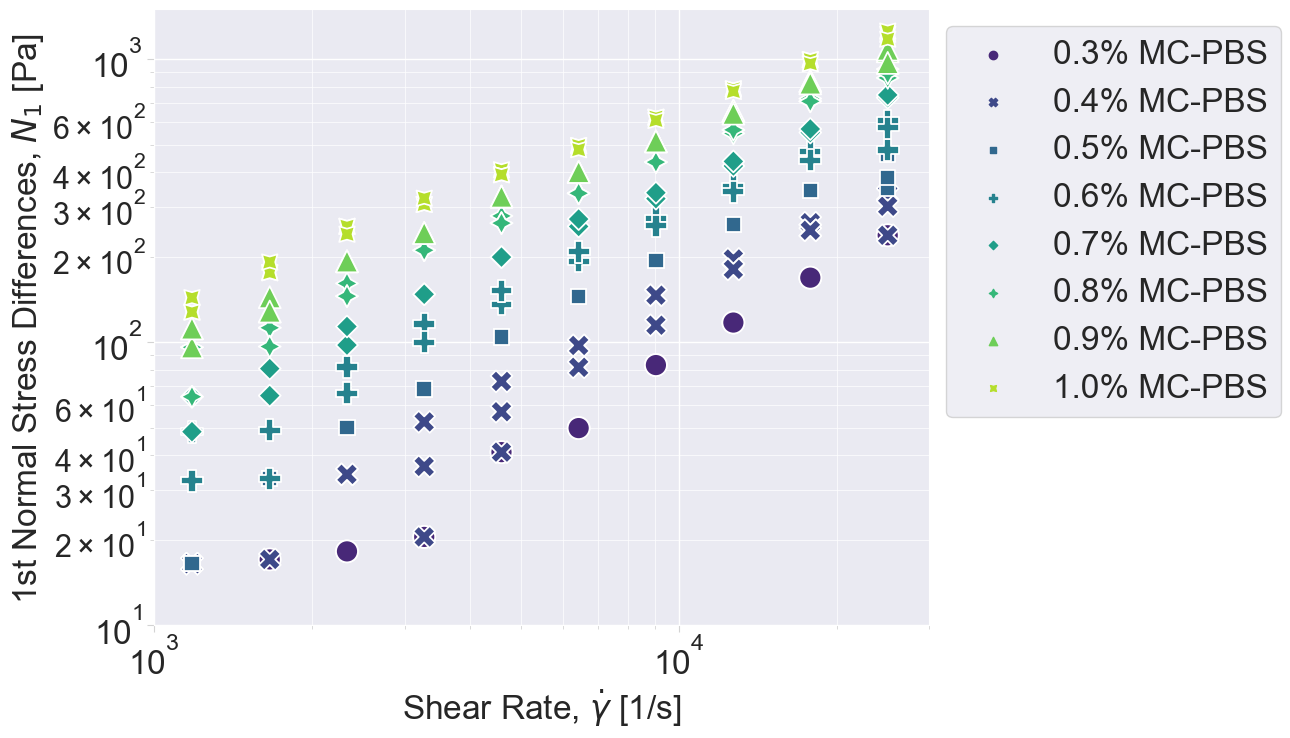

In [4]:
concentrations = df_filt_1['Concentration'].unique()
colors = sns.color_palette('viridis', len(concentrations))
fontsize=24


with sns.axes_style('darkgrid'):
    fig = plt.figure(0, (10,8))
    ax = fig.add_subplot(111)

    vis = sns.scatterplot(x='Shear Rate', y='N1', data=df_filt_1,
                          hue='Buffer', palette='viridis',
                          style='Buffer',
                          s=250,
                          ax=ax)


    ax.set(xscale='log', yscale='log')
    ax.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                   top=False, right=False, color='lightgray')
    ax.tick_params(reset=True, axis='both', which='minor', labelsize=fontsize-2, length=3,
                   top=False, right=False, color='lightgray')

    ax.grid(visible=True, which='minor', axis='both', linewidth=0.5)
    ax.grid(visible=True, which='major', axis='both', linewidth=1)

    y_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=[3,0])
    ax.yaxis.set_minor_formatter(y_minor_formatter)

    plt.xlabel("Shear Rate, $\dot\gamma$ [1/s]", fontsize=fontsize)
    plt.ylabel("1st Normal Stress Differences, $N_1$ [Pa]", fontsize=fontsize)



    plt.legend(bbox_to_anchor=[1,1],fontsize=24)
    ax.set_ylim(10,1500)
    ax.set_xlim(1000, 3e4)

    #savename = "r"..\plots\figure_S2\Figure_S2"
    #fig.savefig(savename+".png", dpi=900, bbox_inches="tight")
    #fig.savefig(savename+".pdf", dpi=900, bbox_inches='tight')
    plt.show()